In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
def delta(t, t_sp):
    if t in t_sp:
        return 1
    else:
        return 0

def simple_REI_model(r_t, e_t, ina_t, u_t, t_rec, t_ina, t_fac, U, dt, t):
    du = (U - u_t) / t_fac + U * (1 - u_t) * delta(t, t_sp) *(1/dt)
    u_t = u_t + du * dt
    
    dr = ina_t / t_rec - u_t * r_t * delta(t, t_sp) *(1/dt)
    de = - e_t / t_ina + u_t * r_t * delta(t,t_sp) * (1/dt)
    dina = e_t / t_ina - ina_t / t_rec
    
    r_t_ = r_t + dr * dt
    e_t_ = e_t + de * dt
    ina_t_ = ina_t + dina * dt
    
    r_t_ = r_t_ /(r_t_ + e_t_ + ina_t_)
    e_t_ = e_t_ /(r_t_ + e_t_ + ina_t_)
    ina_t_ = ina_t_ /(r_t_ + e_t_ + ina_t_)
    return r_t_, e_t_, ina_t_, u_t

r = 0.8
e = 0.01
ina = 1 - r - e
u = 0.02

#mili second
t_rec = 200
t_ina = 10
t_fac = 3000

U = 0.05
A_se = 10

dt = 0.01

T = 300 * (1/dt)
intT = int(T)

time = np.zeros(intT)

r_t = np.zeros(intT)
e_t = np.zeros(intT)
ina_t = np.zeros(intT)
V_t = np.zeros(intT)

u_t = np.zeros(intT)
t_sp_forplot = np.zeros(intT)

r_t[0] = r
e_t[0] = e
ina_t[0] = ina
V_t[0] = A_se * e
u_t[0] = u

t_sp = [10,30,50,70,90,110,130,150,170,190,210,230,250,270,290]

for i in range(intT - 1):
    time[i+1] = i * dt
    r_t[i+1], e_t[i+1], ina_t[i+1], u_t[i+1] = simple_REI_model(r_t[i], e_t[i], ina_t[i], u_t[i], t_rec, t_ina, t_fac, U, dt, i * dt)
    V_t[i+1] = e_t[i+1] * A_se
    if delta(i*dt, t_sp):
        t_sp_forplot[i] = 0.01

[0.8        0.8000095  0.800019   ... 0.12267885 0.12272078 0.12276271]
[0.01       0.00999    0.00998001 ... 0.03873584 0.03869711 0.03865841]
[0.19       0.1900005  0.19000099 ... 0.83858531 0.83858211 0.83857888]
[0.02       0.0200001  0.0200002  ... 0.52570774 0.52570615 0.52570457]


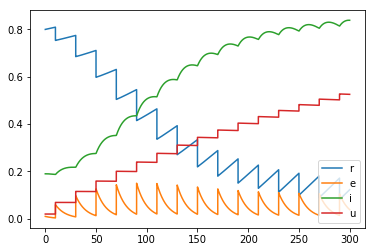

In [70]:
print(r_t)
print(e_t)
print(ina_t)
print(u_t)
plt.plot(time, r_t, label="r")
plt.plot(time, e_t, label="e")
plt.plot(time, ina_t, label="i")
#plt.plot(time, r_t + e_t + ina_t, label="r + e+ i")
plt.plot(time, u_t, label="u")
#plt.plot(time, V_t, label="V")
plt.legend(loc="lower right")